In [ ]:
!pip install catboost

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,average_precision_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''
  Dataset Sources
    1) https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset
    2) https://data.mendeley.com/datasets/dv5z3v2xyd/1
    3) https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset
    4) https://github.com/sohamvsonar/Disease-Prediction-and-Medical-Recommendation-System/tree/main/kaggle_dataset
'''

'\n  Dataset Sources\n    1) https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset\n    2) https://data.mendeley.com/datasets/dv5z3v2xyd/1\n    3) https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset\n    4) https://github.com/sohamvsonar/Disease-Prediction-and-Medical-Recommendation-System/tree/main/kaggle_dataset\n'

In [ ]:
# Reading CSV File of Dataset
df=pd.read_csv("/content/Disease_and_Symptoms_Dataset.csv")

In [ ]:
# Size of Dataset
df.shape

(19642, 377)

In [ ]:
df.head()

,diseases,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,Noninfectious Gastroenteritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alcoholic Hepatitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumonia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allergy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Infectious Gastroenteritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Feature Names
symptoms=list(df.columns)
# Target Names
diseases=list(df[symptoms.pop(0)].unique())

In [ ]:
# Disease Label Counts
df['diseases'].value_counts()

,count
diseases,
Hypoglycemia,1224
Pneumonia,1220
Arthritis,1215
Fungal Infection of the Hair,1212
Infectious Gastroenteritis,1212
Liver Disease,1209
Noninfectious Gastroenteritis,1206
Psoriasis,828
Common Cold,822


In [ ]:
# Check for Duplicate Records
df.duplicated(subset=symptoms).sum()

630

In [ ]:
# Remove Duplicates
df.drop_duplicates(subset=symptoms,keep='first',inplace=True)

In [ ]:
# Disease Label Counts
df.diseases.value_counts()

,count
diseases,
Hypoglycemia,1219
Arthritis,1212
Liver Disease,1204
Pneumonia,1197
Fungal Infection of the Hair,1138
Noninfectious Gastroenteritis,1073
Infectious Gastroenteritis,1072
Dimorphic Hemorrhoids (piles),821
Urinary Tract Infection,818


In [ ]:
# Display the Statistics of Dataset
df.describe()

,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
count,19012.000000,19012.000000,19012.000000,19012.000000,19012.000000,19012.00000,19012.0,19012.000000,19012.000000,19012.000000,...,19012.0,19012.0,19012.0,19012.0,19012.000000,19012.0,19012.0,19012.0,19012.0,19012.0
mean,0.000421,0.000631,0.123133,0.047707,0.097991,0.08300,0.0,0.040343,0.052125,0.000473,...,0.0,0.0,0.0,0.0,0.013307,0.0,0.0,0.0,0.0,0.0
std,0.020509,0.025116,0.328598,0.213151,0.297310,0.27589,0.0,0.196767,0.222285,0.021753,...,0.0,0.0,0.0,0.0,0.114591,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check for Datatypes, Missing Values across each Columns
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
Index: 19012 entries, 0 to 19641
Columns: 377 entries, diseases to neck_weakness
dtypes: int64(376), object(1)
memory usage: 54.8+ MB


,0
diseases,False
anxiety_and_nervousness,False
depression,False
shortness_of_breath,False
depressive_or_psychotic_symptoms,False
...,...
hip_weakness,False
back_swelling,False
ankle_stiffness_or_tightness,False
ankle_weakness,False


In [ ]:
# Check if the Dataframe has any Misssing Values
df.isna().any().any()

False

In [ ]:
print("Number of Symptoms used to Identify the Disease :",len(symptoms))
print("Number of Diseases that can be Identified :",len(diseases))

Number of Symptoms used to Identify the Disease : 376
Number of Diseases that can be Identified : 41


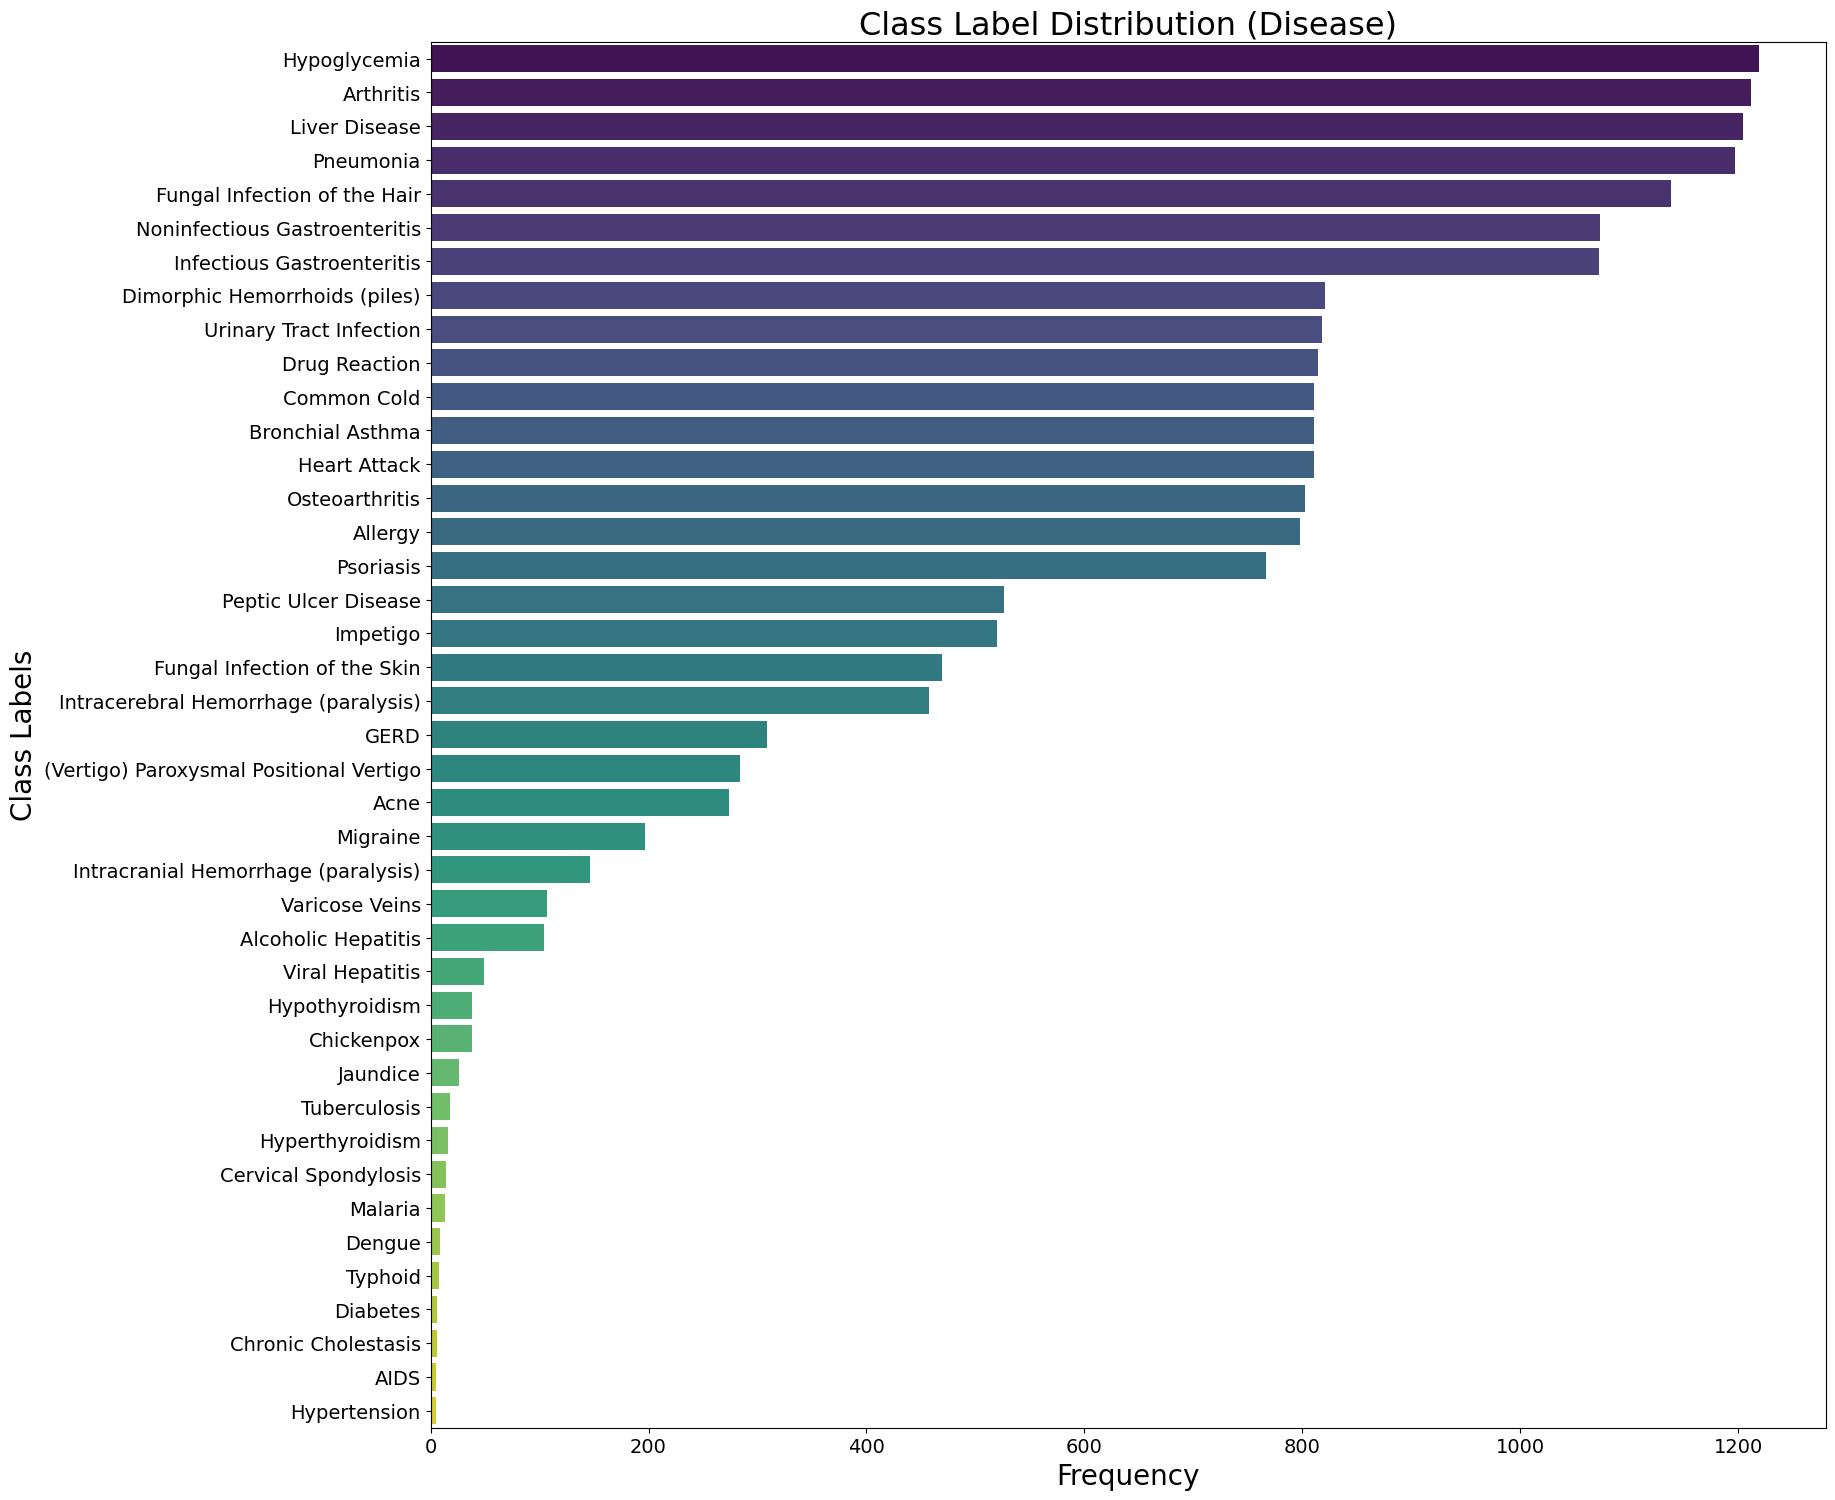

In [ ]:
# Checking for Class Imbalancy using Count Plot
plt.figure(figsize=(18,18))
sns.countplot(y=df['diseases'],order=df['diseases'].value_counts().index,palette="viridis")
plt.title("Class Label Distribution (Disease)",fontsize=23)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("Class Labels",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# Encode the Target Label with Categorical dtype by Preserving their Original Values
le=LabelEncoder()
df['diseases']=le.fit_transform(df['diseases'])
mapper=le.inverse_transform(df['diseases'])
mapper=dict(zip(df['diseases'],mapper))
mapper

{31: 'Noninfectious Gastroenteritis',
 3: 'Alcoholic Hepatitis',
 34: 'Pneumonia',
 4: 'Allergy',
 24: 'Infectious Gastroenteritis',
 38: 'Urinary Tract Infection',
 28: 'Liver Disease',
 10: 'Common Cold',
 32: 'Osteoarthritis',
 35: 'Psoriasis',
 5: 'Arthritis',
 16: 'Fungal Infection of the Skin',
 2: 'Acne',
 18: 'Heart Attack',
 0: '(Vertigo) Paroxysmal Positional Vertigo',
 21: 'Hypoglycemia',
 23: 'Impetigo',
 26: 'Intracranial Hemorrhage (paralysis)',
 15: 'Fungal Infection of the Hair',
 14: 'Drug Reaction',
 33: 'Peptic Ulcer Disease',
 25: 'Intracerebral Hemorrhage (paralysis)',
 6: 'Bronchial Asthma',
 13: 'Dimorphic Hemorrhoids (piles)',
 30: 'Migraine',
 17: 'GERD',
 8: 'Chickenpox',
 39: 'Varicose Veins',
 27: 'Jaundice',
 22: 'Hypothyroidism',
 40: 'Viral Hepatitis',
 36: 'Tuberculosis',
 11: 'Dengue',
 7: 'Cervical Spondylosis',
 1: 'AIDS',
 20: 'Hyperthyroidism',
 29: 'Malaria',
 19: 'Hypertension',
 12: 'Diabetes',
 9: 'Chronic Cholestasis',
 37: 'Typhoid'}

In [ ]:
# Seperate Target Label from Data
x=df.drop(columns='diseases',axis=1)
y=df['diseases']
feature_names=x.columns

In [ ]:
# Split the Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [ ]:
# Set Hyperparam Grids
models={
    "Random Forest": (RandomForestClassifier(class_weight='balanced'),{
        'n_estimators': [50,100],
        'max_depth': [5,10],
        'min_samples_split': [2,5]
    }),
    "XGBoost": (XGBClassifier(objective='multi:softmax',scale_pos_weight=np.sqrt(len(y_train)/y_train.value_counts())),{
        'max_depth': [3,5],
        'learning_rate': [0.05,0.1],
        'n_estimators': [50,100]
    }),
    "LightGBM": (LGBMClassifier(verbose=-1,objective='multiclass',class_weight='balanced'),{
        'num_leaves': [15,31],
        'learning_rate': [0.05,0.1],
        'n_estimators': [50,100]
    }),
    "CatBoost": (CatBoostClassifier(verbose=0,auto_class_weights='Balanced'),{
        'depth': [4,6],
        'learning_rate': [0.05,0.1],
        'iterations': [50,100]
    }),
    "MLP": (MLPClassifier(max_iter=1000,early_stopping=True),{ # Removed class_weight argument
        'hidden_layer_sizes': [(50,),(100,),(50,50)],  # Number of Neurons in the Hidden Layers
        'activation': ['relu'],  # ReLU activation is often Effective for most Tasks
        'alpha': [0.0001,0.001]  # Regularization Strength
    }),
    "Decision Tree": (DecisionTreeClassifier(class_weight='balanced'),{
        'max_depth': [5,10],
        'criterion': ['gini','entropy']
    })
}

In [ ]:
# Define the Scorer for F1 (Weighted) - Suitable for Imbalanced Datasets
scorer=make_scorer(f1_score,average='weighted')
metrics_data=[]
for model_name,(model,param_dist) in models.items():
    print(f"Tuning {model_name}...")
    # Perform RandomizedSearchCV
    random_search=RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring=scorer,
        n_iter=3,
        cv=3,
        n_jobs=-1, # Use all Available Cores (Parallel Computation)
    )
    # Fit on the Training Data
    random_search.fit(x_train,y_train)
    # Best Model and Predictions
    best_model=random_search.best_estimator_
    y_pred=best_model.predict(x_test)
    # Compute Metrics
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    # Store Metrics in a List
    metrics_data.append({
        "Classifier": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    print(f"Best Parameters for {model_name} : {random_search.best_params_}")
    print(f"Best F1 Score for {model_name} : {random_search.best_score_}")
# Convert Metrics Data into a DataFrame
metrics_df=pd.DataFrame(metrics_data)
metrics_df

Tuning Random Forest...
Best Parameters for Random Forest : {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}
Best F1 Score for Random Forest : 0.9380135991903407
Tuning XGBoost...
Best Parameters for XGBoost : {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best F1 Score for XGBoost : 0.9370240565799275
Tuning LightGBM...
Best Parameters for LightGBM : {'num_leaves': 15, 'n_estimators': 100, 'learning_rate': 0.1}
Best F1 Score for LightGBM : 0.9363644000515118
Tuning CatBoost...
Best Parameters for CatBoost : {'learning_rate': 0.1, 'iterations': 100, 'depth': 4}
Best F1 Score for CatBoost : 0.9273470272399681
Tuning MLP...
Best Parameters for MLP : {'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}
Best F1 Score for MLP : 0.9406844578662549
Tuning Decision Tree...
Best Parameters for Decision Tree : {'max_depth': 10, 'criterion': 'entropy'}
Best F1 Score for Decision Tree : 0.46748577154271803


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.944255,0.947871,0.944255,0.944406
1,XGBoost,0.944780,0.944830,0.944780,0.944339
2,LightGBM,0.943992,0.946535,0.943992,0.944589
3,CatBoost,0.930581,0.941252,0.930581,0.932416
4,MLP,0.946621,0.951035,0.946621,0.946160
5,Decision Tree,0.434394,0.677587,0.434394,0.467520


In [ ]:
# Train the Data using MLP CLassifier Model as it gave highest F1 score
clf=MLPClassifier(max_iter=1000,early_stopping=True,hidden_layer_sizes=(50,),activation='relu',alpha=0.0001)
clf.fit(x_train,y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50,), max_iter=1000)

In [ ]:
# Helper Function
def get_metrics_score(y_test,y_pred):
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,average='weighted')
  recall=recall_score(y_test,y_pred,average='weighted')
  f1_scr=f1_score(y_test,y_pred,average='weighted')
  return accuracy,precision,recall,f1_scr

In [ ]:
# Evaluate the Best Model on the Test Set
y_pred=clf.predict(x_test)
accuracy,precision,recall,f1_scr=get_metrics_score(y_test,y_pred)
print(f"Test Set Accuracy : {accuracy:.6f}")
print(f"Precision : {precision:.6f}")
print(f"Recall : {recall:.6f}")
print(f"F1 Score : {f1_scr:.6f}")

Test Set Accuracy : 0.944255
Precision : 0.949733
Recall : 0.944255
F1 Score : 0.943034


In [ ]:
# Custom Prediction Overview Function
def prediction_overview(y_test,y_pred):
  y_true_diseases=[mapper[label] for label in y_test]
  y_pred_diseases=[mapper[label] for label in y_pred]
  prediction_df=pd.DataFrame({
      'Disease': y_true_diseases,
      'y_true': y_test,
      'y_pred': y_pred
  })
  prediction_df['is_correct']=prediction_df['y_true'] == prediction_df['y_pred']
  result_df=prediction_df.groupby('Disease').agg(
      y_test_count=('y_true','size'),
      y_pred_correct_count=('is_correct','sum'),
  ).reset_index()
  result_df['y_pred_wrong_count']=result_df['y_test_count']-result_df['y_pred_correct_count']
  result_df.rename(columns={
      'y_test_count': 'y_test',
      'y_pred_correct_count': 'y_pred_correct',
      'y_pred_wrong_count': 'y_pred_wrong'
  },inplace=True)
  result_df
  return result_df

In [ ]:
# Get Prediction Overview
prediction_overview(y_test,y_pred)

,Disease,y_test,y_pred_correct,y_pred_wrong
0,(Vertigo) Paroxysmal Positional Vertigo,57,56,1
1,AIDS,1,0,1
2,Acne,55,52,3
3,Alcoholic Hepatitis,21,20,1
4,Allergy,160,159,1
5,Arthritis,242,242,0
6,Bronchial Asthma,162,153,9
7,Cervical Spondylosis,3,1,2
8,Chickenpox,8,6,2
9,Chronic Cholestasis,1,0,1


In [ ]:
# CLassification Report
report=classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.982456,0.982456,0.982456,57.000000
1,0.000000,0.000000,0.000000,1.000000
2,0.945455,0.945455,0.945455,55.000000
3,1.000000,0.952381,0.975610,21.000000
4,0.987578,0.993750,0.990654,160.000000
5,1.000000,1.000000,1.000000,242.000000
6,0.938650,0.944444,0.941538,162.000000
7,1.000000,0.333333,0.500000,3.000000
8,1.000000,0.750000,0.857143,8.000000
9,0.000000,0.000000,0.000000,1.000000


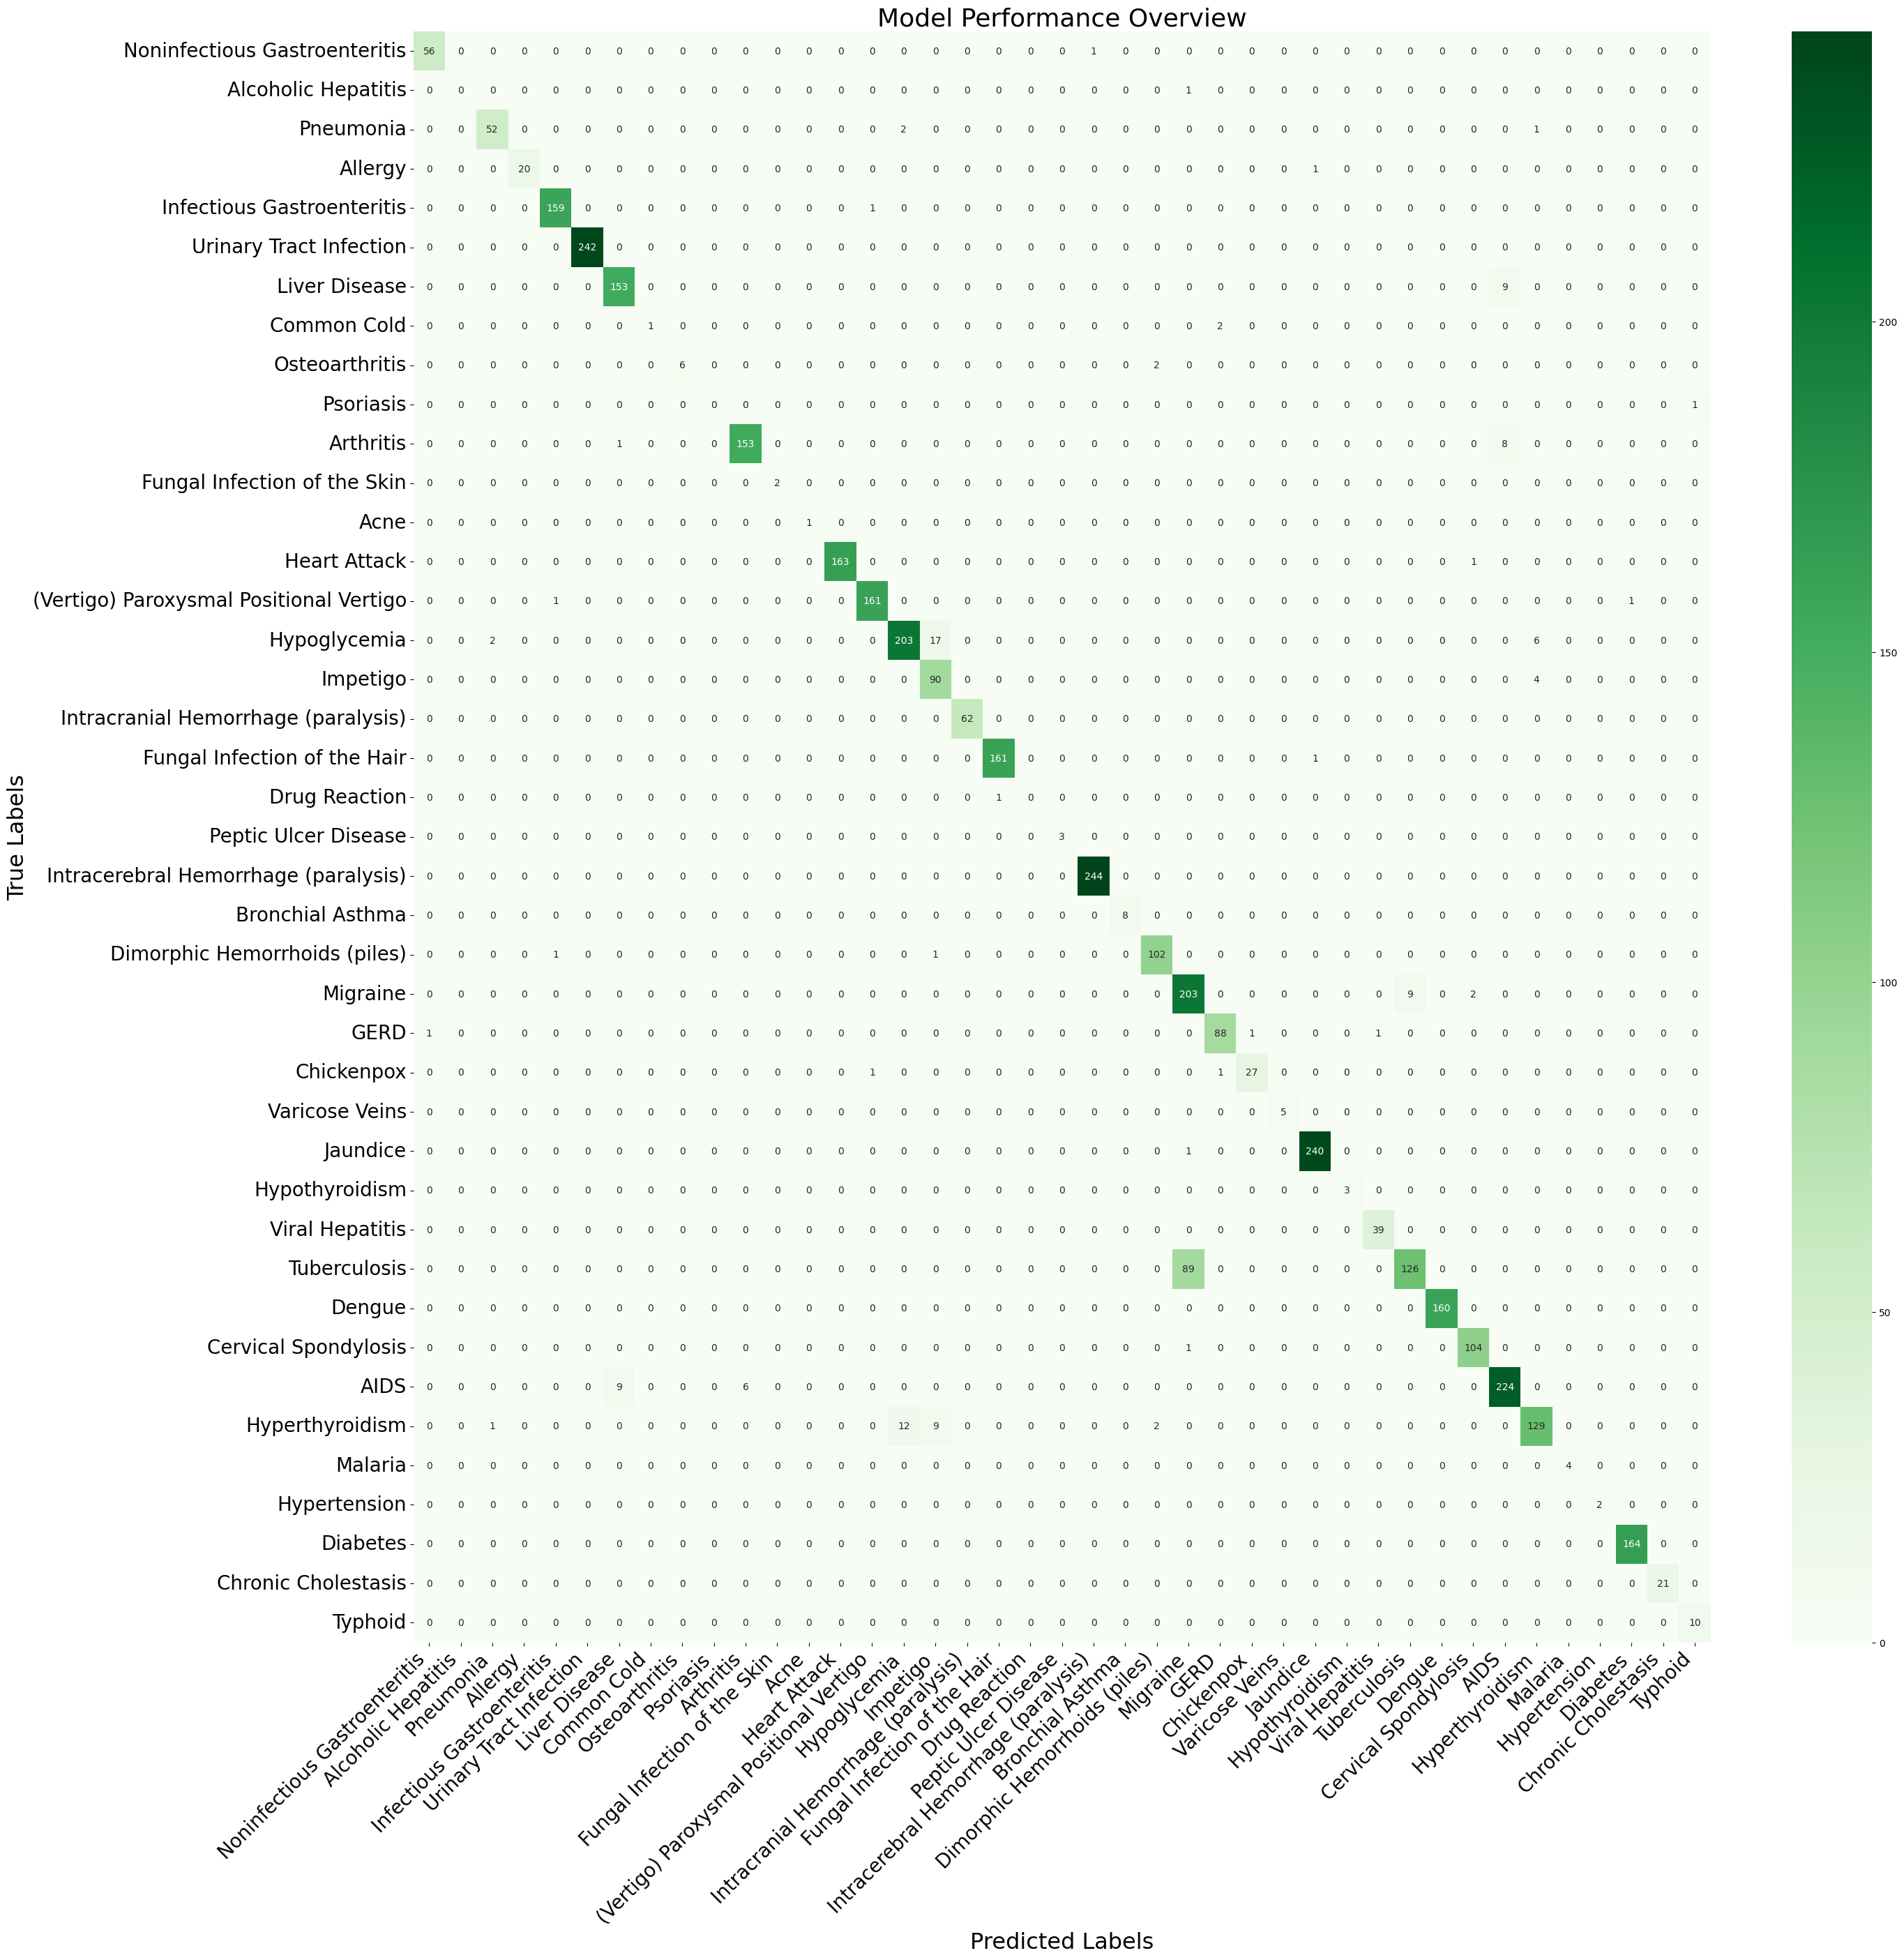

In [ ]:
# Visualize Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(30,30))
plt.title("Model Performance Overview",fontsize=26)
ax=sns.heatmap(cm,annot=True,fmt="d",cmap="Greens",cbar=True)
ticklabels=list(mapper.values())
ax.set_xlabel("Predicted Labels",fontsize=23)
ax.set_ylabel("True Labels",fontsize=23)
ax.set_xticklabels(ticklabels,rotation=45,ha='right',fontsize=20)
ax.set_yticklabels(ticklabels,rotation=0,ha='right',fontsize=20)
plt.show()

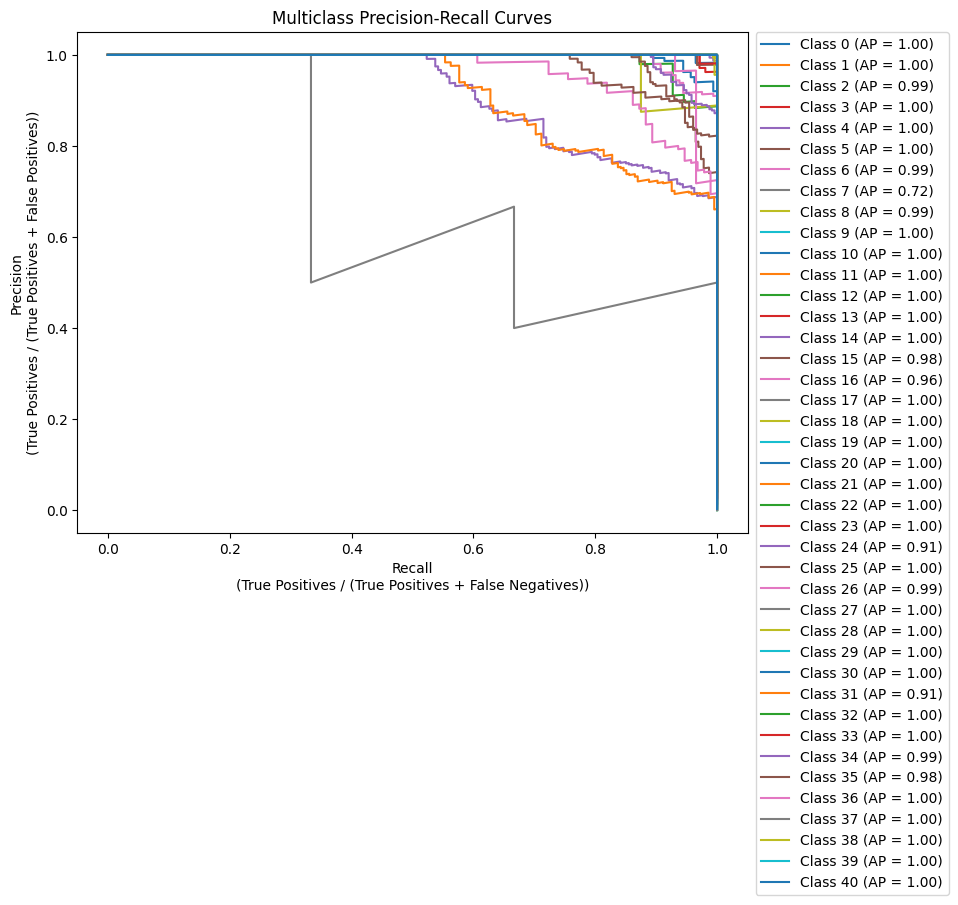

In [ ]:
# As there is Huge Data Imbalancy Precision-Recall Curves are Better Metrics than Accuracy
# Binarize the Output (for Multiclass)
y_test_bin=label_binarize(y_test,classes=np.unique(y_test))
n_classes=y_test_bin.shape[1]
# Predict Probabilities for each Class
y_pred_prob=clf.predict_proba(x_test)
# Plot Precision-Recall Curve for each Class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision,recall,_=precision_recall_curve(y_test_bin[:,i],y_pred_prob[:,i])
    avg_precision=average_precision_score(y_test_bin[:,i],y_pred_prob[:,i])
    plt.plot(recall,precision,label=f'Class {i} (AP = {avg_precision:.2f})')

# AP indicates Average Precision
plt.xlabel('Recall\n(True Positives / (True Positives + False Negatives))')
plt.ylabel('Precision\n(True Positives / (True Positives + False Positives))')
plt.title('Multiclass Precision-Recall Curves')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),borderaxespad=0.)
plt.tight_layout()
plt.show()

In [ ]:
# Check Versions before Saving the Model
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Pickle Version : {pickle.format_version}")
print(f"Scikit-Learn Version : {sklearn.__version__}")

Pandas Version : 2.2.2
Numpy Version : 1.26.4
Pickle Version : 4.0
Scikit-Learn Version : 1.2.2


In [ ]:
# Save the Trained Model
pickle.dump(clf,open('Trained_Classifier_Model.pkl','wb'))

In [ ]:
# Save the Disease Lable Encoder
pickle.dump(le,open('Disease_Label_Encoder.pkl','wb'))

In [ ]:
# Save the Disease Mapper Dictionary
pickle.dump(mapper,open('Disease_Mapper.pkl','wb'))